In [58]:
import csv
import numpy as np
import csv
from sklearn.preprocessing import OneHotEncoder

In [59]:

def read(folder_name):
    list =[]
    with open(folder_name, 'r') as f:
        reader = csv.reader(f)
        for row in reader:
            list.append(row)
    f.close()
    return list

def write_to_csv(filename, data):
    with open(filename, 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerows(data)

def write_db_to_csv(derivatives):
    db_data = [derivatives['db' + str(i + 1)] for i in range(L)]
    write_to_csv('db.csv', db_data)

def writeDWToCsv(derivatives):
    for i in range(L):
        file = open(r'dw.csv', 'a+', newline ='')
        with file:
            write = csv.writer(file)
            array = derivatives['dW' + str(i+1)]
            write.writerows(array)

# relu function
def relu(z):
  return max(0,z)

#for taking the derivative of relu function
def relu_derivative(Z):
  if Z > 0:
    return 1
  return 0

#softmax function
def softmax(Z):
  expZ = np.exp(Z - np.max(Z))
  return expZ / expZ.sum(axis=0, keepdims=True)

def getParameters(weights, biases, L, layers_size):
    parameters = {}
    rowcounter = 0 #for navigating through the rows in weights array which has weights of all layers together
    #store these weights layer wise into parameters dictionary
    for l in range(L):
        parameters["W" + str(l + 1)] = []
        for i in range(layers_size[l]):
            weightsub = np.asarray(weights[rowcounter], dtype=np.float32)
            parameters["W" + str(l + 1)].append(weightsub)
            rowcounter += 1
        parameters["W" + str(l + 1)] = np.array(parameters["W" + str(l + 1)])

    #store the biases layer wise into parameters dictionary
    for l in range(L):
      parameters["b" + str(l + 1)] = []
      for value in biases[l]:
          try:
              value = float(value)
              parameters["b" + str(l + 1)].append(value)
          except ValueError:
              # Handle non-numeric or empty values here, e.g., by skipping or setting a default value
              pass

      parameters["b" + str(l + 1)] = np.array(parameters["b" + str(l + 1)], dtype=np.float32)
    return parameters

def forward_propagation(X, parameters):
  store = {}

  A = X.T # Transpose input
  for l in range(1, L+1):
      layer = str(l)
      Z = np.dot(parameters["W" + str(l)].T, A) + parameters["b" + layer] # Z = W.A + B

      #apply Activation function
      if l == L:
        A = softmax(Z) # output Layer
      else:
        A = np.array(list(map(relu, Z))) # Hidden Layers

      store["A" + layer] = A
      store["W" + layer] = parameters["W" + layer]
      store["Z" + layer] = Z

  return A, store

import numpy as np

def backward_propagation(X, Y, store, precision=16):
    derivatives = {}
    Y = np.asarray(Y, dtype=np.float32)  # Actual output
    store["A0"] = X  # Input
    dZ = store['A' + str(L)] - Y  # Error
    dW = np.outer(store['A' + str(L - 1)], dZ)

    # Round dW to the specified precision
    dW = np.round(dW, precision)

    derivatives["dW" + str(L)] = dW
    derivatives["db" + str(L)] = dZ

    dAPrev = store["W" + str(L)].dot(dZ)  # Initialize dAPrev

    for l in range(L - 1, 0, -1):
        # Compute dZ for the current layer based on ReLU activation
        dZ = np.where(store['Z' + str(l)] > 0, dAPrev, 0)

        # Compute dW for the current layer
        dW = np.outer(dZ, store['A' + str(l - 1)])

        if l > 1:
            dAPrev = store["W" + str(l)].dot(dZ)

        # Round dW to the specified precision
        dW = np.round(dW, precision)

        derivatives["dW" + str(l)] = dW.T
        derivatives["db" + str(l)] = dZ

    return derivatives

In [60]:
NN = "100-40-4" #neural network architecture
INPUT_LAYER_SIZE = 14 #number of inputs to the neural network
EPOCHS = 100
THRESHOLD = 0.4
learning_rate = 0.001
import pandas as pd
BIAESES = f'b-{NN}.csv' #csv file containing the biases of all layers
WEIGHTS = f'w-{NN}.csv' #csv file containing the weights of all layers

L = len(NN.split("-")) #number of layers in the neural network (excluding the input layer)
layers = [INPUT_LAYER_SIZE] + [int(x) for x in NN.split("-")]

X = [-1, 1, 1, 1, -1, -1, 1, -1, 1, 1, -1, -1, 1, 1]
X = np.asarray(X, dtype=int)
Y = [0,0,0,1]

x_train = pd.read_csv('x_train.csv',header=None)
y_train = pd.read_csv('y_train.csv', header=None)
x_test = pd.read_csv('x_test.csv', header=None)
y_test = pd.read_csv('y_test.csv', header=None)

# Create an instance of OneHotEncoder
encoder = OneHotEncoder(sparse=False)
y_train = y_train[0].values

# Fit and transform the array to one-hot encoding
y_train = encoder.fit_transform(y_train.reshape(-1, 1))

weights = read(WEIGHTS)
biases = read(BIAESES)

filtered_weights = [
    [float(value) for value in row[1:] if value.strip() != ''] for row in weights
]
filtered_biases = [
    [float(value) for value in row[1:] if value.strip() != ''] for row in biases
]
parameters = getParameters(filtered_weights, filtered_biases, L, layers)
key_mapping1 = {
    'dW1': 'W1',
    'dW2': 'W2',
    'dW3': 'W3',
}
key_mapping2 = {
    'db1' : 'b1',
    'db2' : 'b2',
    'db3' : 'b3',
}

training_costs = []
accuracy = []


c:\Users\siriw\anaconda3\envs\test1\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [61]:
test_costs = []
test_accuracy = []
x_test = pd.read_csv('x_test.csv', header=None)
y_test = pd.read_csv('y_test.csv', header=None)

In [62]:
# number_of_epochs = 0
# for i in range(EPOCHS):
#     all_derivatives = []
#     squared_errors = []
#     correctly_labled = 0
#     count = len(y_train)

#     for x_row, y_row in zip(x_train.itertuples(index=False), y_train):
#         x_row = np.asarray(list(x_row), dtype=int)
#         y_row = np.asarray(list(y_row), dtype=int)

#         # print(x_row)
#         # print(y_row)
#         # x_row = [-1, 1, 1, 1, -1, -1, 1, -1, 1, 1, -1, -1, 1, 1]
#         # x_row = np.asarray(X, dtype=int)
#         # y_row = [0,0,0,1]

#         try:
#             A, store = forward_propagation(x_row, parameters)
#         except:
#             print(parameters)

#         derivatives = backward_propagation(x_row, y_row, store)
#         all_derivatives.append(derivatives)
#         # print(derivatives)
#         squared_error = np.square(A - y_row)
#         mse = np.mean(squared_error)
#         squared_errors.append(mse)

#         binary_predictions = (A >= THRESHOLD).astype(int)
#         if np.array_equal(binary_predictions, y_row):
#             correctly_labled += 1
#         # else:
#         #   print(binary_predictions, y_row)

#     mean_squared_error = np.mean(squared_errors)
#     mean_derivatives = {}
#     for key in all_derivatives[0]:
#         mean_derivatives[key] = np.mean(np.stack([d[key] for d in all_derivatives], axis=0), axis=0)


#     for layer1, values1 in mean_derivatives.items():
#         if layer1 in key_mapping1:
#             layer2 = key_mapping1[layer1]
#             values2 = parameters.get(layer2, [])
#             new_layer = []

#             for prevVal, gradient in zip(values2, values1):
#                 new_val = prevVal - learning_rate * gradient
#                 new_layer.append(new_val)

#             new_layer = np.asarray(new_layer, dtype=float)
#             parameters[layer2] = new_layer

#         elif layer1 in key_mapping2:
#             layer2 = key_mapping2[layer1]
#             values2 = parameters.get(layer2, [])
#             new_layer = []
#             for prevVal, gradient in zip(values2, values1):
#                 new_val = prevVal - learning_rate * gradient
#                 new_layer.append(new_val)

#             new_layer = np.asarray(new_layer, dtype=float)
#             parameters[layer2] = new_layer
#     print(f"number_of_epochs: {number_of_epochs}", mean_squared_error)
#     training_costs.append(mean_squared_error)
#     accuracy.append((correctly_labled/count)*100)
#     print(correctly_labled, count)
#     number_of_epochs += 1

    



In [63]:
number_of_epochs = 0
for i in range(EPOCHS):
    all_derivatives = []
    squared_errors = []
    correctly_labled = 0
    count = len(y_train)

    for x_row, y_row in zip(x_train.itertuples(index=False), y_train):
        x_row = np.asarray(list(x_row), dtype=int)
        y_row = np.asarray(list(y_row), dtype=int)
        try:
            A, store = forward_propagation(x_row, parameters)
        except:
            print(parameters)

        derivatives = backward_propagation(x_row, y_row, store)
        all_derivatives.append(derivatives)
        # print(derivatives)
        squared_error = np.square(A - y_row)
        mse = np.mean(squared_error)
        squared_errors.append(mse)

        binary_predictions = (A >= THRESHOLD).astype(int)
        if np.array_equal(binary_predictions, y_row):
            correctly_labled += 1
        # else:
        #   print(binary_predictions, y_row)

    mean_squared_error = np.mean(squared_errors)
    mean_derivatives = {}
    for key in all_derivatives[0]:
        mean_derivatives[key] = np.mean(np.stack([d[key] for d in all_derivatives], axis=0), axis=0)


    for layer1, values1 in mean_derivatives.items():
        if layer1 in key_mapping1:
            layer2 = key_mapping1[layer1]
            values2 = parameters.get(layer2, [])
            new_layer = []

            for prevVal, gradient in zip(values2, values1):
                new_val = prevVal - learning_rate * gradient
                new_layer.append(new_val)

            new_layer = np.asarray(new_layer, dtype=float)
            parameters[layer2] = new_layer

        elif layer1 in key_mapping2:
            layer2 = key_mapping2[layer1]
            values2 = parameters.get(layer2, [])
            new_layer = []
            for prevVal, gradient in zip(values2, values1):
                new_val = prevVal - learning_rate * gradient
                new_layer.append(new_val)

            new_layer = np.asarray(new_layer, dtype=float)
            parameters[layer2] = new_layer

    
    # Evaluate on the test data
    test_squared_errors = []
    test_correctly_labeled = 0
    test_count = len(y_test)

    for x_row, y_row in zip(x_test.to_numpy(), y_test.to_numpy()):
        x_row = np.asarray(x_row, dtype=int)
        y_row = np.asarray(y_row, dtype=int)

        try:
            test_A, _ = forward_propagation(x_row, parameters)
        except:
            print(parameters)

        test_squared_error = np.square(test_A - y_row)
        test_mse = np.mean(test_squared_error)
        test_squared_errors.append(test_mse)

        test_binary_predictions = (test_A >= THRESHOLD).astype(int)
        if np.array_equal(test_binary_predictions, y_row):
            test_correctly_labeled += 1

    test_mean_squared_error = np.mean(test_squared_errors)
    test_accuracy.append((test_correctly_labeled / test_count) * 100)
    test_costs.append(test_mean_squared_error)


    print(f"Epoch {i + 1}: Training Loss = {mean_squared_error}, Test Loss = {test_mean_squared_error}") 
    print(f"number_of_epochs: {number_of_epochs}", mean_squared_error)
    training_costs.append(mean_squared_error)
    accuracy.append((correctly_labled/count)*100)
    print(correctly_labled, count)
    number_of_epochs += 1

    



Epoch 1: Training Loss = 0.37941072862018704, Test Loss = 3.1709642966127554
number_of_epochs: 0 0.37941072862018704
3090 13107
Epoch 2: Training Loss = 0.35778591592278935, Test Loss = 3.14613537952534
number_of_epochs: 1 0.35778591592278935
3728 13107
Epoch 3: Training Loss = 0.3499521709819067, Test Loss = 3.0154669795478197
number_of_epochs: 2 0.3499521709819067
3251 13107
Epoch 4: Training Loss = 0.21331623101873387, Test Loss = 3.0036990566493147
number_of_epochs: 3 0.21331623101873387
3503 13107
Epoch 5: Training Loss = 0.20209894136199708, Test Loss = 2.9981799665787023
number_of_epochs: 4 0.20209894136199708
3512 13107
Epoch 6: Training Loss = 0.19685120889299806, Test Loss = 2.994321711797631
number_of_epochs: 5 0.19685120889299806
212 13107
Epoch 7: Training Loss = 0.19340577871710338, Test Loss = 2.991754724741836
number_of_epochs: 6 0.19340577871710338
181 13107
Epoch 8: Training Loss = 0.19114762389756976, Test Loss = 2.9900873607591216
number_of_epochs: 7 0.1911476238975

In [64]:
trainig_Cost_Test_0_1 = training_costs
Accuaracy_Test_0_1 = accuracy
Accuaracy_Test_0_1

[23.57518883039597,
 28.44281681544213,
 24.803540093080034,
 26.726176852063784,
 26.794842450598917,
 1.617456321049821,
 1.3809414816510261,
 1.2054627298390175,
 1.0833905546654459,
 0.9384298466468299,
 0.8468757152666514,
 0.8087281605249105,
 0.7400625619897764,
 0.6561379415579461,
 0.6256198977645533,
 0.6027313649195087,
 0.5798428320744641,
 0.5645838101777676,
 0.5569542992294194,
 0.5416952773327229,
 0.5264362554360266,
 0.49591821164263367,
 0.4882887006942855,
 0.4882887006942855,
 0.4882887006942855,
 0.4882887006942855,
 0.47302967879758906,
 0.4654001678492409,
 0.4654001678492409,
 0.4654001678492409,
 0.4654001678492409,
 0.4654001678492409,
 0.4654001678492409,
 0.4654001678492409,
 0.4806591897459373,
 0.4806591897459373,
 0.4806591897459373,
 0.4806591897459373,
 0.4806591897459373,
 0.4806591897459373,
 0.4882887006942855,
 0.4806591897459373,
 0.4806591897459373,
 0.4882887006942855,
 0.5035477225909819,
 0.5035477225909819,
 0.5188067444876783,
 0.54169527733

In [65]:
print(test_accuracy, test_costs)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [3.1709642966127554, 3.14613537952534, 3.0154669795478197, 3.0036990566493147, 2.9981799665787023, 2.994321711797631, 2.991754724741836, 2.9900873607591216, 2.988977528451208, 2.98819545424501, 2.9876287597641644, 2.9872147171832273, 2.9869157694267527, 2.986676516208419, 2.9864772063592517, 2.9863215437161466, 2.986196287157416, 2.98609636932468, 2.9860151549657665, 2.985944844609406, 2.985879277953226, 2.9858306473030085, 2.985789396345614, 2.9857564793122093, 2.9857305439377892, 2.9857108947

In [66]:
len(training_costs)

100

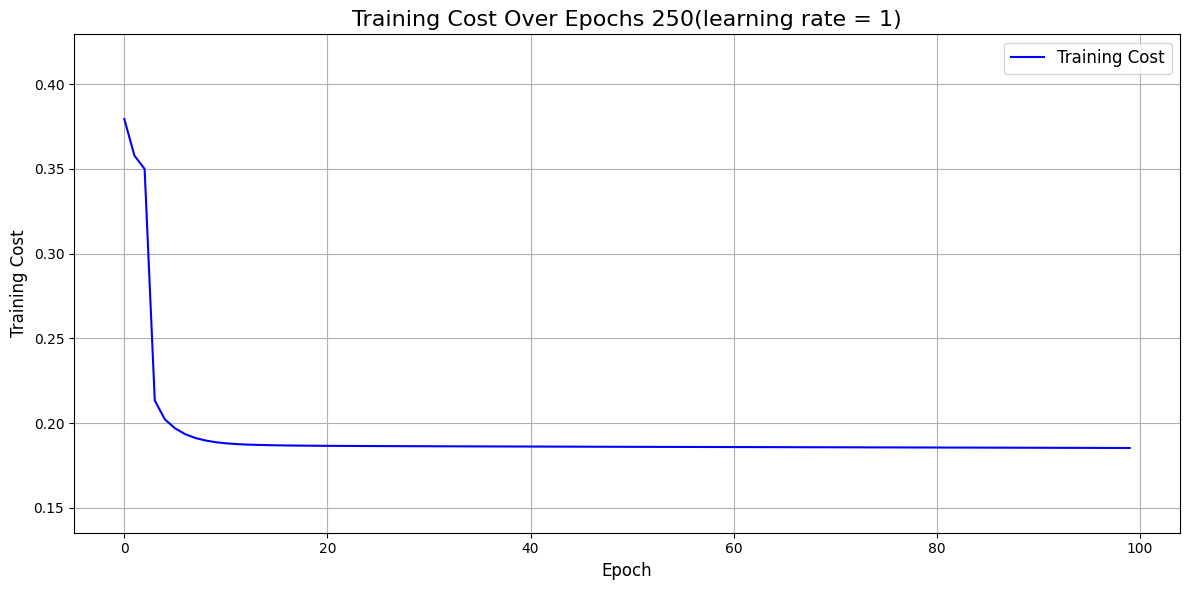

In [67]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
plt.plot( training_costs, marker='', linestyle='-', color='b', label='Training Cost')
plt.title("Training Cost Over Epochs 250(learning rate = 1)", fontsize=16)
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Training Cost", fontsize=12)
plt.grid(True)
plt.legend(loc='upper right', fontsize=12)  # Add a legend
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ylim(min(training_costs) - 0.05, max(training_costs) + 0.05)  # Adjust y-axis limits
plt.tight_layout()  # Improve spacing
plt.show()


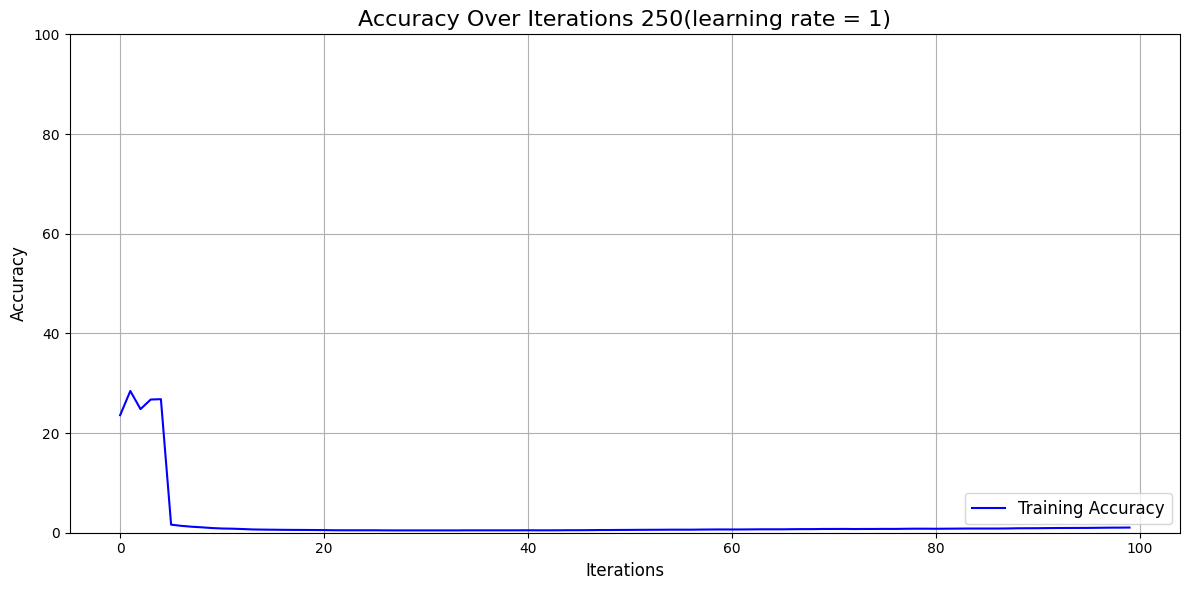

In [68]:
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
plt.plot(accuracy, marker='', linestyle='-', color='b', label='Training Accuracy')
plt.title("Accuracy Over Iterations 250(learning rate = 1)", fontsize=16)
plt.xlabel("Iterations", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.grid(True)
plt.legend(loc='lower right', fontsize=12)  # Add a legend
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ylim(0, 100)  # Set the y-axis limit (0 to 1 for accuracy)
plt.tight_layout()  # Improve spacing
plt.show()

In [69]:
weights = read(WEIGHTS)
biases = read(BIAESES)

filtered_weights = [
    [float(value) for value in row[1:] if value.strip() != ''] for row in weights
]
filtered_biases = [
    [float(value) for value in row[1:] if value.strip() != ''] for row in biases
]

parameters = getParameters(filtered_weights, filtered_biases, L, layers)



In [70]:

A, store = forward_propagation(X,parameters)
derivatives = backward_propagation(X,Y,store)

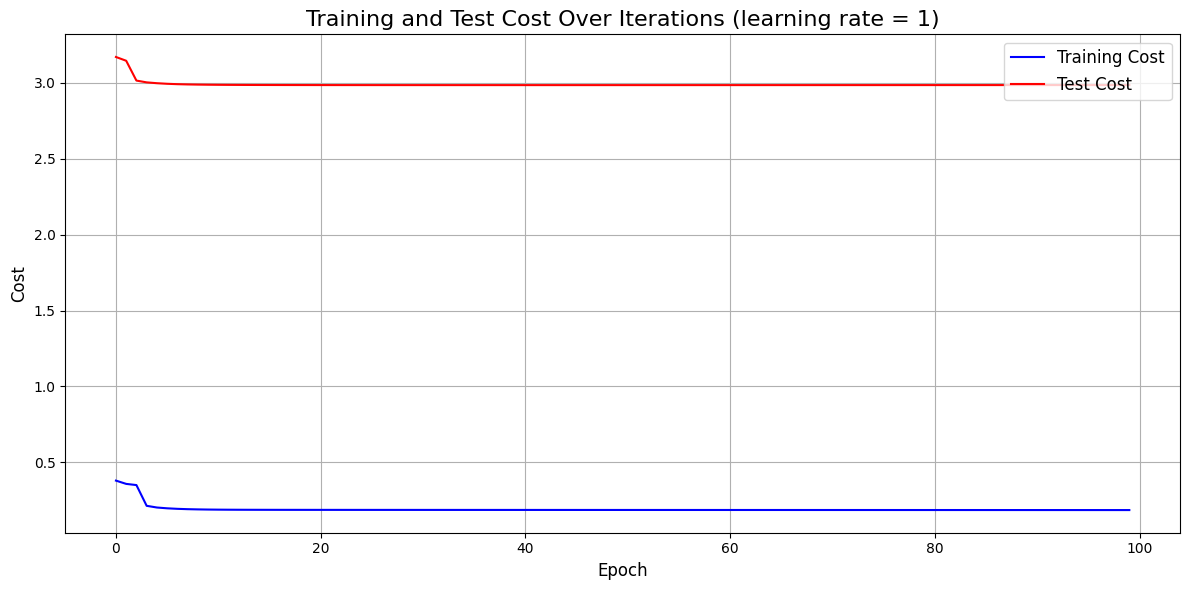

In [71]:
# Plot training and test cost (loss)
plt.figure(figsize=(12, 6))
plt.plot(training_costs, marker='', linestyle='-', color='b', label='Training Cost')
plt.plot(test_costs, marker='', linestyle='-', color='r', label='Test Cost')
plt.title("Training and Test Cost Over Iterations (learning rate = 1)", fontsize=16)
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Cost", fontsize=12)
plt.grid(True)
plt.legend(loc='upper right', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

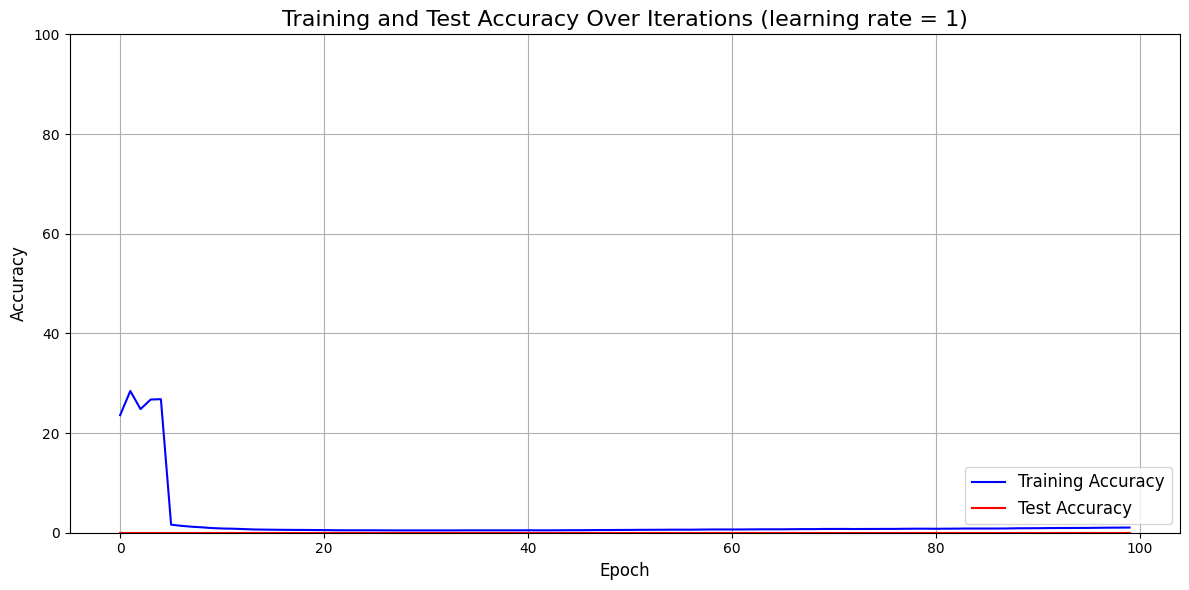

In [72]:
# Plot training and test accuracy
plt.figure(figsize=(12, 6))
plt.plot(accuracy, marker='', linestyle='-', color='b', label='Training Accuracy')
plt.plot(test_accuracy, marker='', linestyle='-', color='r', label='Test Accuracy')
plt.title("Training and Test Accuracy Over Iterations (learning rate = 1)", fontsize=16)
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.grid(True)
plt.legend(loc='lower right', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ylim(0, 100)
plt.tight_layout()
plt.show()